In [10]:
import sys
sys.path.insert(0, './../Libs/')
import numpy as np
from LinearClassification import TwoClassesClassification
from BasisFunction import BaseBasicFunction
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.utils import shuffle

def _shuffle(X, t):
    X, t = shuffle(X, t.ravel())
    t = t.reshape(-1, 1)
    return (X, t)

def __classify(x, t):
    if t < 0.5:
        return False
    return True

def _classify(X, t):
    X1 = []
    X0 = []
    for i in range(len(t)):
        if __classify(X[i], t[i]):
            X1.append(X[i])
        else:
            X0.append(X[i])
    return (np.array(X0), np.array(X1))

In [11]:
Nsample = 200
sampleNoise = 0.1

Training cross entropy = 
2.6981869453578984
[[-4.43647087  0.99163201]
 [ 3.66672379 -1.35873408]
 [ 4.60941254 -2.46202075]
 [-2.47086549  1.67117761]
 [ 8.34564869 -1.23628967]
 [-2.18442628  4.3662452 ]
 [ 3.3125811  -3.98643321]
 [ 4.08262478  1.57717267]
 [-4.65831936  2.97764999]
 [ 5.85375006 -5.17774766]]


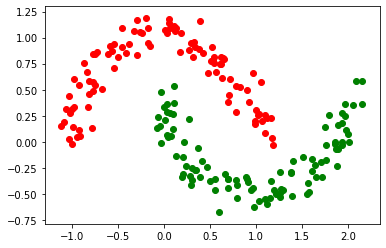

In [12]:
X, t = skdata.make_moons(n_samples = Nsample, noise = sampleNoise, shuffle = False, random_state = 0)
halfSample = int(Nsample/2)
plt.scatter(X[:halfSample, 0], X[:halfSample, 1], c = 'r')
plt.scatter(X[halfSample:, 0], X[halfSample:, 1], c = 'g')

X, t = _shuffle(X, t)
funcs = [
    lambda x: x[:, 0],
    lambda x: x[:, 1],
    lambda x: np.multiply(x[:, 0], x[:, 1]),
    lambda x: np.power(x[:, 0], 2),
    lambda x: np.power(x[:, 1], 2),
    lambda x: np.multiply(np.power(x[:, 0], 2), x[:, 1]),
    lambda x: np.multiply(np.power(x[:, 1], 2), x[:, 0]),
    lambda x: np.power(x[:, 0], 3),
    lambda x: np.power(x[:, 1], 3),
#     lambda x: np.multiply(np.power(x[:, 0], 3), x[:, 1]),
#     lambda x: np.multiply(np.power(x[:, 1], 3), x[:, 0]),
#     lambda x: np.multiply(np.power(x[:, 0], 2), np.power(x[:, 1], 2)),
#     lambda x: np.power(x[:, 0], 4),
#     lambda x: np.power(x[:, 1], 4),
]

Xfeatures = BaseBasicFunction(X, funcs).generate()
classifier = TwoClassesClassification(Xfeatures, t, Nepoch = 100, eta = 0.05).fit()
print(classifier.w)

In [13]:
X, t = skdata.make_moons(n_samples = Nsample, noise = sampleNoise, shuffle = False, random_state = 100)
halfSample = int(Nsample/2)

Xfeatures = BaseBasicFunction(X, funcs).generate()

prediction = classifier.predict(Xfeatures, t.reshape(-1, 1))

Cross entropy for prediction = 
664.483819672115


[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
(45469, 2)
(44531, 2)


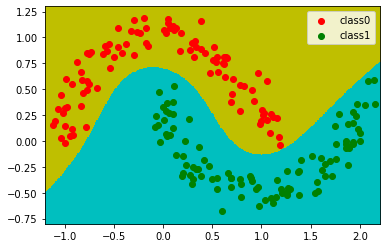

In [14]:
xlim = (-1.2, 2.2)
ylim = (-0.8, 1.3)
X, t = skdata.make_moons(n_samples = Nsample, noise = sampleNoise, shuffle = False, random_state = 0)
halfSample = int(Nsample/2)

xplot = np.linspace(xlim[0], xlim[1], 300)
yplot = np.linspace(ylim[0], ylim[1], 300)
xgrid, ygrid = np.meshgrid(xplot, yplot)
xgrid = xgrid.reshape(-1, 1)
ygrid = ygrid.reshape(-1, 1)

xygrid = np.hstack((xgrid, ygrid))
xyFeatures = BaseBasicFunction(xygrid, funcs).generate()
prediction = classifier.predict(xyFeatures)

print(prediction)
X0, X1 = _classify(xygrid, prediction)

print(X0.shape)
print(X1.shape)
plt.scatter(X0[:, 0].ravel(), X0[:, 1].ravel(), c = 'y', marker = 's', s = 5)
plt.scatter(X1[:, 0].ravel(), X1[:, 1].ravel(), c = 'c', marker = 's', s = 5)

plt.scatter(X[:halfSample, 0], X[:halfSample, 1], c = 'r', label = "class0")
plt.scatter(X[halfSample:, 0], X[halfSample:, 1], c = 'g', label = "class1")

plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()

Training cross entropy = 
88.80324651093113
Training cross entropy = 
20.662467718554034
Training cross entropy = 
4.231485906788363
Training cross entropy = 
0.27172859943785727
Training cross entropy = 
0.001831635201234865
Training cross entropy = 
7.235035857167877e-06
Training cross entropy = 
-4.4408920985006255e-14
Training cross entropy = 
-4.4408920985006255e-14
Training cross entropy = 
-4.4408920985006255e-14
Training cross entropy = 
-4.4408920985006255e-14
Training cross entropy = 
-4.4408920985006255e-14
Training cross entropy = 
-4.4408920985006255e-14
Training cross entropy = 
-4.4408920985006255e-14
Training cross entropy = 
-4.4408920985006255e-14
Training cross entropy = 
-4.4408920985006255e-14


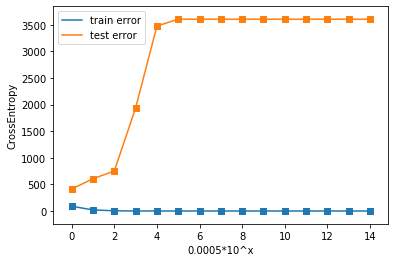

In [15]:
def trainAndTest(eta, xtrain, ytrain, xtest, ytest):
    model = TwoClassesClassification(xtrain, ytrain, Nepoch = 100, eta = eta).fit()
    trainErr = model.trainCrossEntropy()
    prediction = model._predict(xtest)
    testErr = model._crossEntropy(ytest, prediction)
    return trainErr.item(), testErr.item()

N_eta = 15
baseEta = 0.0005

Xeta_train, teta_train = skdata.make_moons(n_samples = Nsample, noise = sampleNoise, shuffle = True, random_state = 200)
Xeta_train = BaseBasicFunction(Xeta_train, funcs).generate()
teta_train = teta_train.reshape(-1, 1)

Xeta_test, teta_test = skdata.make_moons(n_samples = Nsample, noise = sampleNoise, shuffle = True, random_state = 300)
Xeta_test = BaseBasicFunction(Xeta_test, funcs).generate()
teta_test = teta_test.reshape(-1, 1)

mseLstTest = []
mseLstTrain = []

for i in range(N_eta):
    eta = baseEta * (10**i)
    trainErr, testErr = trainAndTest(eta, Xeta_train, teta_train, Xeta_test, teta_test)
    mseLstTrain.append(trainErr)
    mseLstTest.append(testErr)
    
    
xLambPlot = np.array([i for i in range(N_eta)])
mseLstTrain = np.array(mseLstTrain)
mseLstTest = np.array(mseLstTest)

plt.plot(xLambPlot, mseLstTrain, label = "train error")
plt.plot(xLambPlot, mseLstTest, label = "test error")
plt.scatter(xLambPlot, mseLstTrain, marker = 's')
plt.scatter(xLambPlot, mseLstTest, marker = 's')
plt.xlabel("{}*10^x".format(baseEta))
plt.ylabel("CrossEntropy")
plt.legend()

/Users/tuantran/anaconda3/envs/p37env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 0 0 ... 1 1 1]
(44992, 2)
(45008, 2)


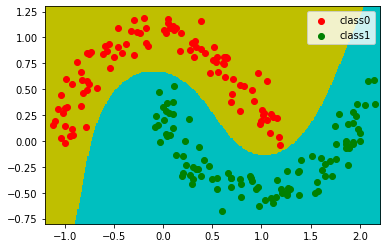

In [16]:
from sklearn.linear_model import LogisticRegression
X, t = skdata.make_moons(n_samples = Nsample, noise = sampleNoise, shuffle = False, random_state = 100)
Xfeatures = BaseBasicFunction(X, funcs).generate()
classifier = LogisticRegression(C = 100).fit(Xfeatures, t)

xlim = (-1.2, 2.2)
ylim = (-0.8, 1.3)
X, t = skdata.make_moons(n_samples = Nsample, noise = sampleNoise, shuffle = False, random_state = 0)
halfSample = int(Nsample/2)

xplot = np.linspace(xlim[0], xlim[1], 300)
yplot = np.linspace(ylim[0], ylim[1], 300)
xgrid, ygrid = np.meshgrid(xplot, yplot)
xgrid = xgrid.reshape(-1, 1)
ygrid = ygrid.reshape(-1, 1)

xygrid = np.hstack((xgrid, ygrid))
xyFeatures = BaseBasicFunction(xygrid, funcs).generate()

prediction = classifier.predict(xyFeatures)

print(prediction)
X0, X1 = _classify(xygrid, prediction)

print(X0.shape)
print(X1.shape)
plt.scatter(X0[:, 0].ravel(), X0[:, 1].ravel(), c = 'y', marker = 's', s = 5)
plt.scatter(X1[:, 0].ravel(), X1[:, 1].ravel(), c = 'c', marker = 's', s = 5)

plt.scatter(X[:halfSample, 0], X[:halfSample, 1], c = 'r', label = "class0")
plt.scatter(X[halfSample:, 0], X[halfSample:, 1], c = 'g', label = "class1")

plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()

